In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_csv('ex1data1.txt',names = ['Population','Profit'])

In [5]:
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


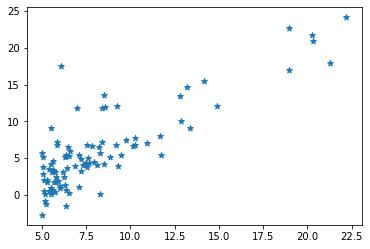

In [22]:
data1.plot(x='Population',y='Profit',kind='scatter',figsize=(12,8)) #plottin using pandas' plot() funct.
%matplotlib inline
plt.scatter(data1['Population'],data1['Profit'],marker='*')

In [7]:
data1.insert(0,'ones',1) # inserting ones which will be multiplied with the bias term
x_univariate = data1.loc[:,['ones','Population']]
y_univariate = data1.loc[:,['Profit']]
data1.head()



,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
x_univariate.head() 

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y_univariate.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
data1.describe()

,ones,Population,Profit
count,97.0,97.000000,97.000000
mean,1.0,8.159800,5.839135
std,0.0,3.869884,5.510262
min,1.0,5.026900,-2.680700
25%,1.0,5.707700,1.986900
50%,1.0,6.589400,4.562300
75%,1.0,8.578100,7.046700
max,1.0,22.203000,24.147000


In [11]:
x_univariate = np.matrix(np.array(x_univariate[:]))   # converting to numpy matrix as numpy is faster at calculations
y_univariate = np.matrix(np.array(y_univariate[:]))
theta_univariate = np.matrix(np.array([0,0]))         # initializing theta values to zero

In [12]:
x_univariate.shape , y_univariate.shape , theta_univariate.shape 

((97, 2), (97, 1), (1, 2))

In [13]:
def ComputeCost(x,y,theta):                                        # Cost function
    squared_error = np.power((x.dot(theta.T)  - y),2)
    return np.sum(squared_error) / (2 * len(x))
   

In [14]:
print(ComputeCost(x_univariate,y_univariate,theta_univariate))     #cost with initial thetas i.e [0,0]

32.072733877455676


In [15]:
iterations_1 = 2000
alpha_1 = 0.01
def GradientDescent(x,y,theta,alpha,iterations):
    cost = np.zeros(iterations)
    temp = np.matrix(np.zeros(theta.shape))
    parameters = theta.shape[1]
    
    for i in range(iterations):
        error = (x * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ( (alpha/len(x)) * np.sum(term) )
        theta = temp
        cost[i] = ComputeCost(x,y,theta)
    
    return(theta , cost)

In [16]:
theta_univariate , cost_univariate = GradientDescent(x_univariate,y_univariate,theta_univariate,
                                                     alpha_1,iterations_1)

In [17]:
theta_univariate  # learned parameters

matrix([[-3.78806857,  1.18221277]])

In [18]:
cost_univariate[-1:-10:-1]    # costs (the first value in this list is the minimum cost i.e the cost when theta = [-3.788,1.182])

array([4.47802761, 4.47803143, 4.47803526, 4.47803911, 4.47804297,
       4.47804684, 4.47805073, 4.47805463, 4.47805855])

Text(0, 0.5, 'Profit')

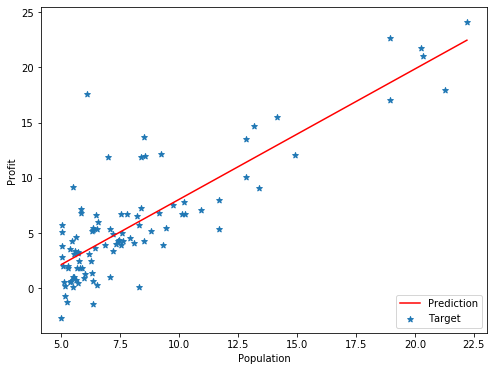

In [23]:
x_temp = np.linspace(data1.Population.min(),data1.Population.max(),100)
f = theta_univariate[0,0] + (theta_univariate[0,1] * x_temp) # y = c + mx

%matplotlib inline 
fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(data1.Population, data1.Profit, marker='*', label = 'Target')
ax.plot(x_temp , f, 'r', label='Prediction')
ax.legend(loc=4)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')

<IPython.core.display.Javascript object>


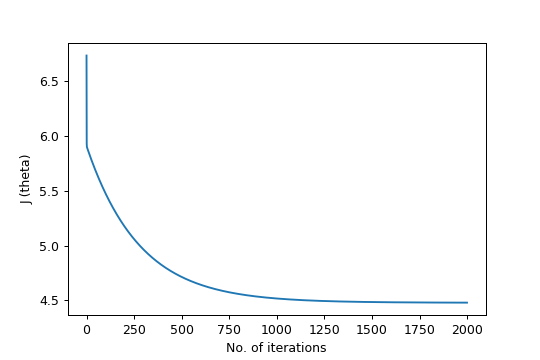

In [26]:
%matplotlib notebook
iter = np.arange(iterations_1)
plt.plot(iter,cost_univariate)
plt.xlabel('No. of iterations')
plt.ylabel('J (theta)')
plt.show()

In [27]:
def predict_univariate(val,theta):
    y = theta[0,0] + theta[0,1]*val
    return y
predict_univariate(15,theta_univariate)


13.94512304863754

In [28]:
f.shape

(100,)

#           MULTIVARIATE REGRESSION

In [29]:
pwd

'C:\\STUDY\\content\\Andrew Ng\\machine-learning-ex1'

In [30]:
data2 = pd.read_csv('ex1data2.txt',names = ['Population','No_bedroom','Profit'])

In [31]:
data2.head()

,Population,No_bedroom,Profit
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [32]:
data2 = ( data2 - data2.mean() ) / data2.std()  # mean normalization using standard deviation

In [33]:
data2.insert(0,'ones',1)
data2['ones'] = data2['ones'].fillna(1)
data2.head()


,ones,Population,No_bedroom,Profit
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [34]:
x_multivariate = data2.loc[:,['ones','Population','No_bedroom']]
y_multivariate = data2.loc[:,['Profit']]


In [35]:
x_multivariate.head()

,ones,Population,No_bedroom
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [36]:
y_multivariate.head()

,Profit
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [37]:
x_multivariate = np.matrix(x_multivariate[:])
y_multivariate = np.matrix(y_multivariate[:])
theta_multivariate = np.matrix([0,0,0])
x_multivariate.shape , y_multivariate.shape , theta_multivariate.shape


((47, 3), (47, 1), (1, 3))

In [38]:
iterations_2 , alpha_2 = 1000 , 0.01
theta_multivariate , cost_multivariate = GradientDescent(x_multivariate,y_multivariate
                                                         ,theta_multivariate,alpha_2,iterations_2)

In [39]:
ComputeCost(x_multivariate,y_multivariate,theta_multivariate)

0.13070336960771892

In [40]:
x_temp1 = np.linspace(data2.Population.min(),data2.Population.max(),100)
x_temp2 = np.linspace(data2.No_bedroom.min(),data2.No_bedroom.max(),100)
f = theta_multivariate[0,0] + (theta_multivariate[0,1]*x_temp1) + (theta_multivariate[0,2]*x_temp2) 

<IPython.core.display.Javascript object>


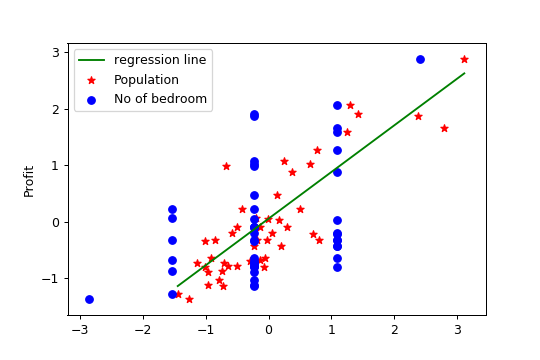

In [41]:
%matplotlib notebook
plt.plot(x_temp1,f,label='regression line',c='g')
plt.scatter(data2.Population,data2.Profit,c='r',marker='*',label='Population')
plt.scatter(data2.No_bedroom,data2.Profit,c='b',label='No of bedroom')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [ ]:
np.unique(data2['No_bedroom'])


<IPython.core.display.Javascript object>


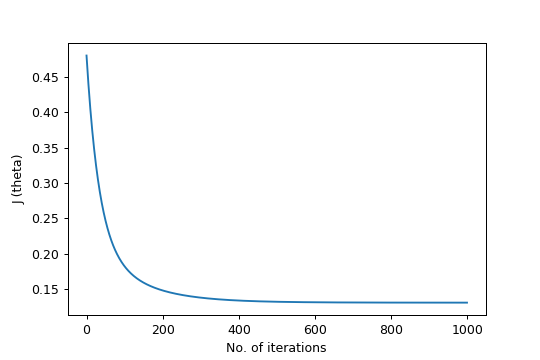

Text(0, 0.5, 'J (theta)')

In [42]:
%matplotlib notebook
iter = np.arange(iterations_2)
plt.plot(iter,cost_multivariate)
plt.xlabel('No. of iterations')
plt.ylabel('J (theta)')